# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#!pip install pandas-profiling

# Loading Data

In [3]:
data = pd.read_csv('Dataset.csv')

In [4]:
data.head()

,likes,Checkins,Returns,Category,commBase,comm24,comm48,comm24_1,"diff_24,48",baseTime,...,fri_pub,sat_pub,sun_base,mon_base,tue_base,wed_base,thu_base,fri_base,sat_base,output
0,634995,0,463.0,1.0,0.0,0,0.0,0,0,65,...,0,0,0,0.0,0,0,0,0,1,0
1,634995,0,463.0,1.0,0.0,0,0.0,0,0,10,...,0,0,0,0.0,0,0,0,1,0,0
2,634995,0,463.0,1.0,0.0,0,0.0,0,0,14,...,1,0,0,0.0,0,0,0,0,1,0
3,634995,0,463.0,1.0,7.0,0,3.0,7,-3,62,...,1,0,0,1.0,0,0,0,0,0,0
4,634995,0,463.0,1.0,1.0,0,0.0,1,0,58,...,0,0,0,0.0,0,1,0,0,0,0


# Problem Statement

The goal is to predict that a post is expected to recieve next H hours. Find the features that contributes to the comments and determine the correlation

**Page Features**

All the below comes under Page Features

1. Page Likes - No of Followers / No of Supporters
Features = 'likes'

2. Page Checkins - No of individuals checked into that page
Features = 'Checkins'

3. Page Talking About - Defines the daily interest of individuals towards source of the document/ post. It gives the no.of people came again to the page after liking the page. This includes the activites such as comments, likes to the post, shares,...by visitors to the page.
FEatures = 'Returns'

4. Page Category = It characterizes the class of the page
Feature = 'Category'


**Comments Features** : It defines remarks on the post at different time intervels with respect to the randomly choosen base time.

1. CC1 = total no.of comments before choosen base date-time
Feature = 'CommBase'


2. CC2 = Total No.of comments in last 24 hrs wrt to choosen base Date-time
Feature = 'comm24'


3. CC3 = Total No.of comments in last 48 hrs to 24 hrs wrt to choosen base Date-time
Feature = 'comm48'


4. CC4 = Total No.of comments in first in 24 hrs after publication of post but before base
Feature = 'comm24_1'


5. CC5 = Set btw CC2 and CC3. How distinct the value in CC2 is differed from CC3
Feature = 'diff 24,48'

**Post Features** :

1. Basetime – Selected time in order to simulate the scenario.
Feature - "baseTime"


2. Post Length – Character count in the post.
Feature – "length"


3. Post share count -  (no.of shares of post) No.of people shared the post on to their timeline.
Feature – "shares"


4. Post Promotion status – not given in dataset. Whether post is promoted or not.


5.  H local – This describe the H hrs for which the target / coments recieved.
Feature – "hrs"

**Timeline / Weekday Features** : Binary pointers (0,1) refers to the day of the week on which the post was distributed and the day on which the prediction is to compute.
    
1. Post published weekday – the day on which the post was published.
**Features** - "sun_pub, mon_pub, tue_pub, wed_pub, thu_pub, fri_pub, sat_pub"


2. Base datetime week day – the day on which the selected base datatime lie.
**Features** - "sun_base, mon_base, tue_base, wed_base, thu_base, fri_base, sat_base"
    

**Target Variable** : No of Comments in next 24 hours. 
    **Feature** = 'output'

In [5]:
data.dtypes

likes           int64
Checkins        int64
Returns       float64
Category      float64
commBase      float64
comm24          int64
comm48        float64
comm24_1        int64
diff_24,48      int64
baseTime        int64
length          int64
shares        float64
hrs             int64
sun_pub         int64
mon_pub       float64
tue_pub         int64
wed_pub         int64
thu_pub       float64
fri_pub         int64
sat_pub         int64
sun_base        int64
mon_base      float64
tue_base        int64
wed_base        int64
thu_base        int64
fri_base        int64
sat_base        int64
output          int64
dtype: object

Convert all data types into integer. This is because the values in the each Features are specific and there is no use of having decimal point in those values. Hence it is replaced.  

In [6]:
data = data.apply(np.int64)
data = data.replace(-9223372036854775808,np.nan)

**Check the Dimension of Data Set**

In [7]:
dim = data.shape
print('Records:',dim[0])
print('Features:',dim[1])

Records: 40949
Features: 28


**Features in the Data Set**

In [8]:
columns = data.columns.tolist()
data.info()
print('\n')
print("{} features with 1 target variable.".format(len(columns)-1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 28 columns):
likes         40949 non-null int64
Checkins      40949 non-null int64
Returns       40898 non-null float64
Category      40892 non-null float64
commBase      40889 non-null float64
comm24        40949 non-null int64
comm48        40901 non-null float64
comm24_1      40949 non-null int64
diff_24,48    40949 non-null int64
baseTime      40949 non-null int64
length        40949 non-null int64
shares        38500 non-null float64
hrs           40949 non-null int64
sun_pub       40949 non-null int64
mon_pub       39022 non-null float64
tue_pub       40949 non-null int64
wed_pub       40949 non-null int64
thu_pub       37904 non-null float64
fri_pub       40949 non-null int64
sat_pub       40949 non-null int64
sun_base      40949 non-null int64
mon_base      38979 non-null float64
tue_base      40949 non-null int64
wed_base      40949 non-null int64
thu_base      40949 non-null int64


# Descriptive Statistics

In [9]:
data.loc[:,['likes','Checkins','Returns','commBase','comm24','comm48','comm24_1','diff_24,48','length','shares','output']].describe()

,likes,Checkins,Returns,commBase,comm24,comm48,comm24_1,"diff_24,48",length,shares,output
count,4.094900e+04,40949.000000,4.089800e+04,40889.000000,40949.000000,40901.00000,40949.000000,40949.000000,40949.000000,38500.000000,40949.000000
mean,1.313814e+06,4676.133752,4.485611e+04,55.793783,22.186647,19.67260,52.631591,2.536961,163.652470,124.571610,7.322889
std,6.785752e+06,20593.184863,1.109917e+05,137.062715,77.124263,71.11712,128.179920,94.202974,376.264387,974.140185,35.494550
min,3.600000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,-1366.000000,0.000000,1.000000,0.000000
25%,3.673400e+04,0.000000,7.010000e+02,2.000000,0.000000,0.00000,2.000000,-6.000000,38.000000,2.000000,0.000000
50%,2.929110e+05,0.000000,7.237000e+03,11.000000,2.000000,0.00000,10.000000,0.000000,97.000000,15.000000,0.000000
75%,1.204214e+06,99.000000,5.141100e+04,46.000000,12.000000,9.00000,44.000000,3.000000,172.000000,67.000000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,2341.000000,2079.000000,1605.00000,2184.000000,2079.000000,21480.000000,144860.000000,1305.000000


In [10]:
data.loc[:,['Category','baseTime','hrs','sub_base','mon_base','tue_base','wed_base','thu_base','fri_base','sat_base','sun_pub','mon_pub','tue_pub','wed_pub','thu_pub','fri_pub','sat_pub']].describe()

,Category,baseTime,hrs,sub_base,mon_base,tue_base,wed_base,thu_base,fri_base,sat_base,sun_pub,mon_pub,tue_pub,wed_pub,thu_pub,fri_pub,sat_pub
count,40892.000000,40949.000000,40949.000000,0.0,38979.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,39022.000000,40949.000000,40949.000000,37904.000000,40949.000000,40949.000000
mean,24.272449,35.322035,23.767833,NaN,0.088663,0.137635,0.148599,0.150846,0.143886,0.144888,0.122347,0.126313,0.149747,0.157489,0.135579,0.146157,0.136926
std,19.950812,20.916864,1.919829,NaN,0.284261,0.344520,0.355698,0.357903,0.350979,0.351992,0.327691,0.332206,0.356828,0.364265,0.342346,0.353268,0.343774
min,1.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,17.000000,24.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,35.000000,24.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,53.000000,24.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,106.000000,72.000000,24.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Check the Skewness

In [11]:
data.skew()

likes          56.094235
Checkins        6.211708
Returns        14.231003
Category        1.740191
commBase        6.075857
comm24          9.225479
comm48          8.813735
comm24_1        5.938391
diff_24,48      2.861457
baseTime        0.040098
length         19.590576
shares        100.605312
hrs            -9.216961
sun_pub         2.305048
mon_pub         2.249841
tue_pub         1.963243
wed_pub         1.880652
thu_pub         2.129074
fri_pub         2.003349
sat_pub         2.112385
sun_base        2.055601
mon_base        2.894232
tue_base        2.103697
wed_base        1.975935
thu_base        1.951203
fri_base        2.029360
sat_base        2.017830
output         14.293299
dtype: float64

# Null Handling

**Check the Null Values**

In [12]:
nulls = data.isnull().sum()
print('Total Missing Values is {} which is {}% of total data'.format(nulls.sum(), round((nulls.sum()/(data.shape[0]*data.shape[1]))*100,3)))
nulls

Total Missing Values is 9607 which is 0.838% of total data


likes            0
Checkins         0
Returns         51
Category        57
commBase        60
comm24           0
comm48          48
comm24_1         0
diff_24,48       0
baseTime         0
length           0
shares        2449
hrs              0
sun_pub          0
mon_pub       1927
tue_pub          0
wed_pub          0
thu_pub       3045
fri_pub          0
sat_pub          0
sun_base         0
mon_base      1970
tue_base         0
wed_base         0
thu_base         0
fri_base         0
sat_base         0
output           0
dtype: int64

# Exploratory Data Analysis

**Top 10 Category wise  total likes**

In [13]:
data['likes'].unique()

array([   634995,   3995273,    798622,    257132,   1552629,    400487,
         2283681,      2630, 162624443,       530,   4015562,     88359,
         8488256,   8552792,   1425417,      6887,  14032442,   2516731,
         4541886,   9249800,    188849,      1621,   2055279,      6040,
         9102550,    517146,   1977515,   2035731,    115669,      3440,
           12301,    304835,   2351938,     12802,    329587,    579587,
         3544586,      7634,    425753,      1573,    413095,   5970921,
         5586080,   1055660,   5093610,   3002026,   2522433,   1611220,
           81756,     17365,     19028,      1777,    806441,    420838,
          672411,    259412,    123680,    104037,  10276668,    700738,
         4290409,      8189,   4253181,   1488908,    487823,   1078827,
         6141231,   5503253,   2411555,    356059,  17490232,   1441347,
          115804,    555304,      2373,   1251509,      3611,   3996923,
          142636,    996915,      4662,     55975, 

In [14]:
data['Category'].unique()

array([  1.,   4.,   5.,  nan,   9.,  13.,  14.,  15.,  16.,  17.,   8.,
        18.,  19.,  20.,  21.,  22.,  23.,   2.,  24.,  25.,  28.,  29.,
        30.,  31.,  32.,  34.,  36.,  27.,  38.,  39.,  33.,  46.,  47.,
        45.,  49.,  50.,  54.,  55.,  44.,  56.,  57.,  58.,  59.,  60.,
        62.,  26.,  67.,  68.,   6.,  72.,  42.,  73.,  75.,  76.,  63.,
        77.,  12.,  79.,  80.,  40.,  35.,  81.,  82.,  83.,  10.,  87.,
        89.,  90.,  91.,  11.,  93.,  96., 100., 101.,  85.,  92.,  51.,
       105.,  66., 106.,  61.,   3.])

In [15]:
total_likes = data.drop_duplicates('likes').groupby('Category').agg({'likes':'sum'}).sort_values(by='likes', ascending = False). reset_index()

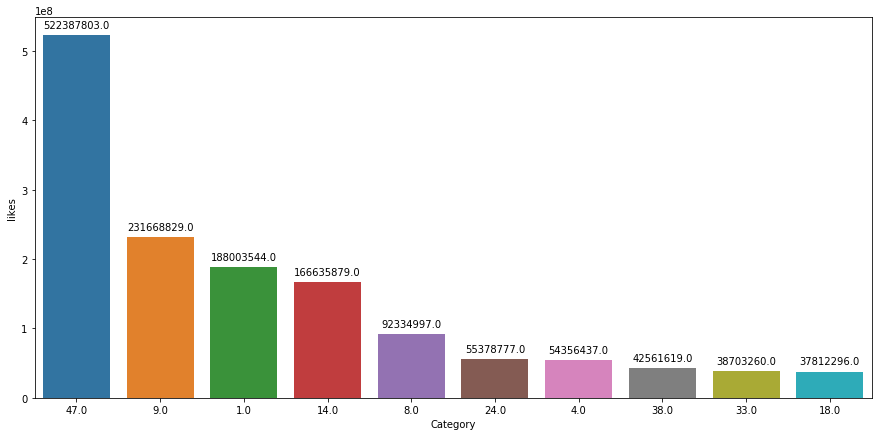

In [16]:
plt.subplots(figsize = (15,7))
act = sns.barplot(x='Category', y='likes', data=total_likes.iloc[0:10], order= total_likes.iloc[0:10].Category.values.tolist())
for p in act.patches:
    act.annotate(p.get_height(), (p.get_x()+p.get_width()/2, p.get_height()), ha = 'center', va = 'center', xytext = (0,10), textcoords = 'offset points')
title = 'Top 10 Category wise likes'
plt.show()

Through above chart we are analyzing category wise likes

**Top 10 Category wise total returns**

In [17]:
data['Returns'].unique()

array([4.630000e+02, 2.971470e+05, 3.466800e+04, 4.880000e+02,
       6.464100e+04, 5.783300e+04, 4.520000e+02, 1.000000e+00,
       1.242488e+06, 0.000000e+00, 3.811000e+03, 4.200000e+01,
       2.835700e+05, 5.750000e+03, 8.415300e+04, 2.000000e+01,
       3.515400e+04, 2.052900e+04, 6.528300e+04, 8.886400e+04,
       2.455000e+03, 2.300000e+01, 2.630280e+05, 5.900000e+01,
       1.942020e+05, 1.917900e+04, 9.237000e+04, 6.523000e+03,
       7.450000e+02, 1.640000e+02, 8.700000e+01, 1.474870e+05,
       2.975320e+05, 3.100000e+01, 1.127100e+04, 3.311600e+04,
       2.276170e+05, 1.100000e+01, 1.093800e+04, 1.470000e+02,
       1.930100e+04, 2.345010e+05, 7.445000e+04, 1.203050e+05,
       5.347900e+04, 7.724000e+04, 2.392500e+05, 9.484000e+03,
       2.947000e+03, 3.447000e+03, 1.900000e+01, 7.301100e+04,
       6.060000e+02, 1.422100e+04, 9.910000e+02, 1.492000e+03,
       3.000000e+01, 4.170880e+05, 1.600000e+03, 1.314220e+05,
       3.300000e+01, 4.729260e+05, 1.661980e+05, 4.9009

In [18]:
data['Category'].unique()

array([  1.,   4.,   5.,  nan,   9.,  13.,  14.,  15.,  16.,  17.,   8.,
        18.,  19.,  20.,  21.,  22.,  23.,   2.,  24.,  25.,  28.,  29.,
        30.,  31.,  32.,  34.,  36.,  27.,  38.,  39.,  33.,  46.,  47.,
        45.,  49.,  50.,  54.,  55.,  44.,  56.,  57.,  58.,  59.,  60.,
        62.,  26.,  67.,  68.,   6.,  72.,  42.,  73.,  75.,  76.,  63.,
        77.,  12.,  79.,  80.,  40.,  35.,  81.,  82.,  83.,  10.,  87.,
        89.,  90.,  91.,  11.,  93.,  96., 100., 101.,  85.,  92.,  51.,
       105.,  66., 106.,  61.,   3.])

As per description we are given are explained that the feature Returns = all the activites that the page is undergoing through like commenting, likes, share ...etc.
so we are dropping duplicates in the Returns feature which has been grouped by Category

In [19]:
total_returns = data.drop_duplicates('Returns').groupby('Category').agg({'Returns':'sum'}).sort_values(by = 'Returns', ascending = False).reset_index()

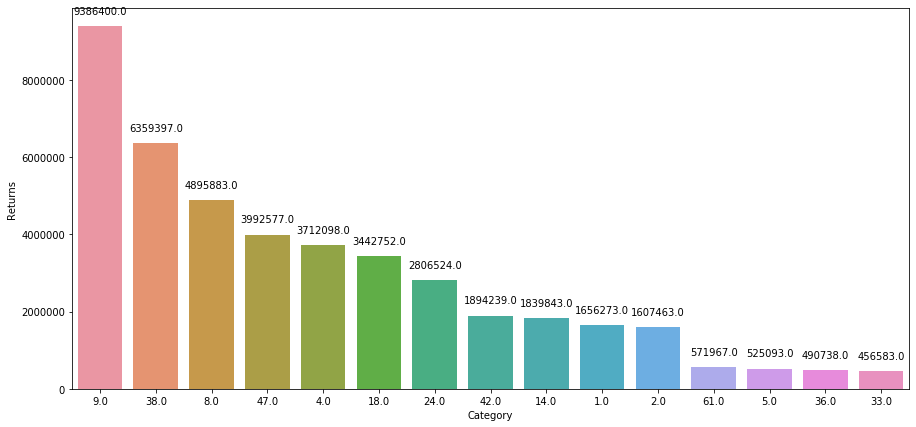

In [20]:
plt.subplots(figsize=(15,7))
act = sns.barplot(x='Category', y='Returns', data=total_returns.iloc[0:15], order = total_returns.iloc[0:15].Category.values.tolist())
for p in act.patches:
    act.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 15), textcoords = 'offset points')
plt.show()

The above graph is explaining how many time the page has been visited to perform any type of action wrt to the category wise. and the top 15 categories are only considered to analyze.

Category 9 and 38 are the top two most pages having more activites

**Top 10 Category wise No of Posts Published**

In [21]:
data['Category'].unique()

array([  1.,   4.,   5.,  nan,   9.,  13.,  14.,  15.,  16.,  17.,   8.,
        18.,  19.,  20.,  21.,  22.,  23.,   2.,  24.,  25.,  28.,  29.,
        30.,  31.,  32.,  34.,  36.,  27.,  38.,  39.,  33.,  46.,  47.,
        45.,  49.,  50.,  54.,  55.,  44.,  56.,  57.,  58.,  59.,  60.,
        62.,  26.,  67.,  68.,   6.,  72.,  42.,  73.,  75.,  76.,  63.,
        77.,  12.,  79.,  80.,  40.,  35.,  81.,  82.,  83.,  10.,  87.,
        89.,  90.,  91.,  11.,  93.,  96., 100., 101.,  85.,  92.,  51.,
       105.,  66., 106.,  61.,   3.])

In [22]:
cat = pd.DataFrame(data.loc[:,'Category'])
cat['post'] = 1
Published_posts = cat.groupby('Category').sum().sort_values(by='post', ascending=False).reset_index()

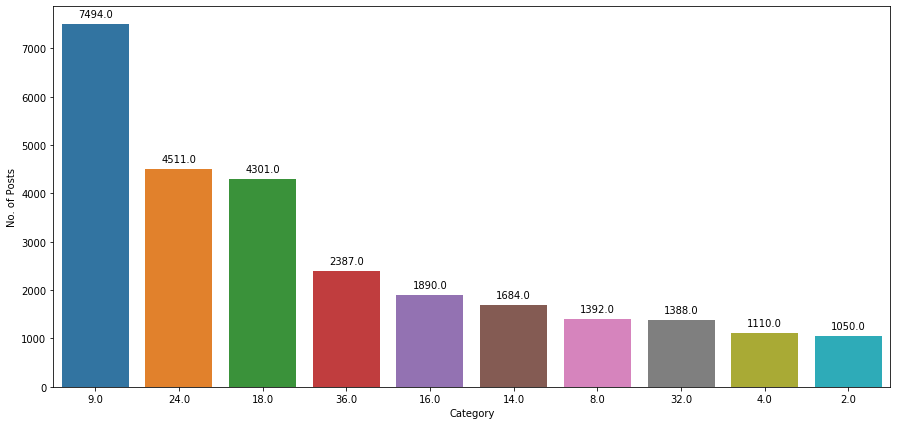

In [23]:
plt.subplots(figsize=(15,7))
act = sns.barplot(x='Category', y='post', data=Published_posts.iloc[0:10], order=Published_posts.iloc[0:10].Category.values.tolist())
act.set(xlabel='Category', ylabel='No. of Posts')
for p in act.patches:
    act.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

The above graph is used to analyze top 10 posts that are been posted in each category in a increased.

**Top 10 Category wise No.of Comments**

In [24]:
data['Category'].unique()

array([  1.,   4.,   5.,  nan,   9.,  13.,  14.,  15.,  16.,  17.,   8.,
        18.,  19.,  20.,  21.,  22.,  23.,   2.,  24.,  25.,  28.,  29.,
        30.,  31.,  32.,  34.,  36.,  27.,  38.,  39.,  33.,  46.,  47.,
        45.,  49.,  50.,  54.,  55.,  44.,  56.,  57.,  58.,  59.,  60.,
        62.,  26.,  67.,  68.,   6.,  72.,  42.,  73.,  75.,  76.,  63.,
        77.,  12.,  79.,  80.,  40.,  35.,  81.,  82.,  83.,  10.,  87.,
        89.,  90.,  91.,  11.,  93.,  96., 100., 101.,  85.,  92.,  51.,
       105.,  66., 106.,  61.,   3.])

In [25]:
data['output'].unique()

array([   0,    3,    5,    2,   15,    1,    9,  342,   35,   92,   51,
        119,    7,   71,   14,    8,   30,    4,   10,  409,   28,  372,
         23,  102,   26,  431,    6,  145,   90,  760,   57,  501,   56,
         31,  642,   43,  320,   55,  128,  233,   20,   53,  280,  200,
         94,   11,  161,   58,  187,   17,  206,  173,   34,  189,   91,
        105,   49,   64,   48,   25,   18,   13,  156,   27,   21,   12,
         44,   85,  174,  223,  111,  380,  253,  107,  756,   39,  323,
        278,   16,   19,   96,   66,   40,   45,   79,   22,   36,   52,
         24,   61,  193,   93,   67,   63,   74,   38,   98,  106,  139,
         78,  169,   29,   81,   42,  114,   37,  392,   60,   54,  123,
         47,   32,  115,   33,  136,  116,   75,  110,   86,  188,   76,
        252,  142,  336,  424,  322,  195,  120,   68,  201,  527,   89,
         99,  198,  295,  170,  704,  121,  160,   41,   50,  129,  152,
        113,   46,  182,   62,  133,   77,  154,  1

Here lets take Category & output features to know in which category there is highest no of comments recorded. so that the reason we are grouping output features with category.

In [26]:
Cat = pd.DataFrame(data.loc[:,['Category','output']])
cp = Cat.groupby('Category').sum().sort_values(by='output', ascending=False).reset_index()

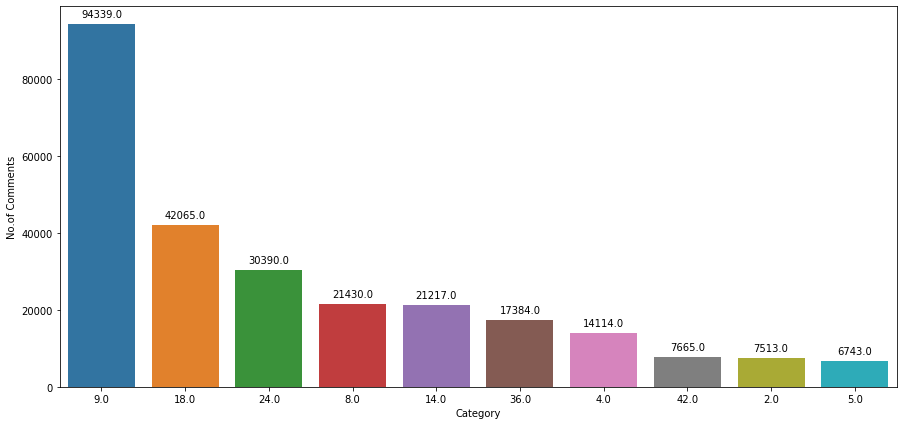

In [27]:
plt.subplots(figsize = (15,7))
act = sns.barplot(x = 'Category', y = 'output', data = cp.iloc[0:10], order=cp.iloc[0:10].Category.values.tolist())
act.set(xlabel='Category', ylabel= 'No.of Comments')
for p in act.patches:
    act.annotate(p.get_height(),(p.get_x()+p.get_width()/2, p.get_height()), ha= 'center', va = 'center', xytext = (0,10), textcoords='offset points')
plt.show()  

**Daywise No. of Posts Published**

In [28]:
pairdays = data.loc[:,['sun_pub','mon_pub','tue_pub','wed_pub','thu_pub','fri_pub','sat_pub']]
pairdays.columns=['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
order_p = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
pairdays = pairdays.stack()
pairdays = pd.DataFrame(pd.Categorical(pairdays[pairdays!=0].index.get_level_values(1)))
pairdays.columns = ['post_publishweek']
pairdays['post'] = 1
weekpost = pairdays.groupby('post_publishweek').sum().reset_index()

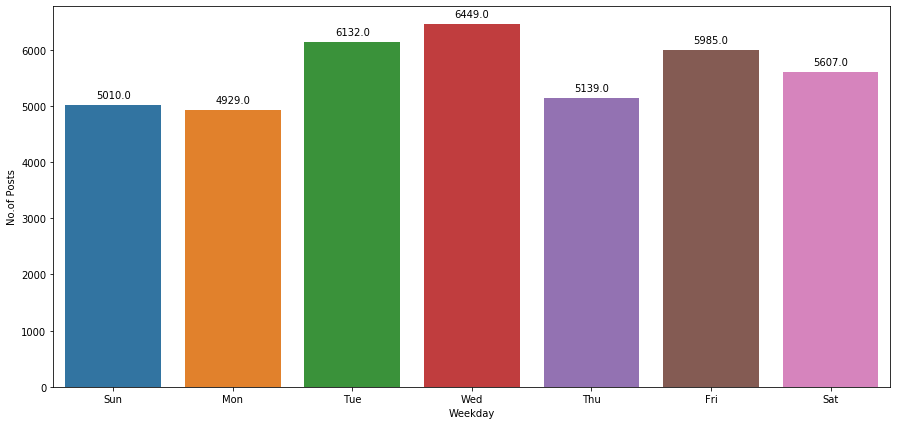

In [29]:
plt.subplots(figsize=(15,7))
act = sns.barplot(x='post_publishweek', y='post', data = weekpost, order=order_p)
act.set(xlabel='Weekday', ylabel='No.of Posts')
for p in act.patches:
    act.annotate(p.get_height(), (p.get_x()+p.get_width()/2, p.get_height()), ha= 'center', va = 'center', xytext = (0,10), textcoords = 'offset points')
plt.show()    

From above graph we can analyze how many posts are been done on the each week day

**Analyzing Distribution of Features**

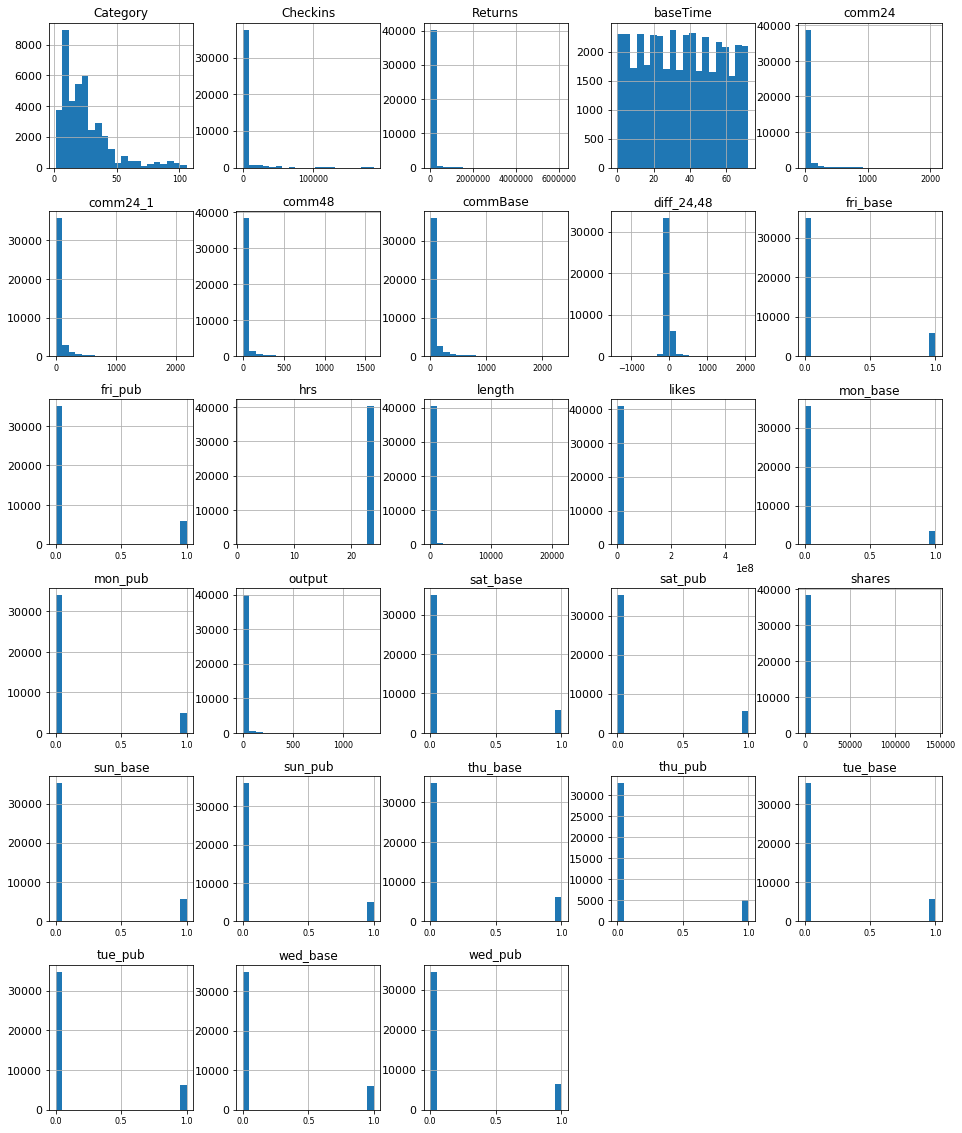

In [30]:
data.hist(figsize=(16,20), bins=20, xlabelsize=8, ylabelsize=11)
plt.savefig('Distribution of Features.png')
plt.show()

# Null Handling

In [31]:
data.isnull().sum()

likes            0
Checkins         0
Returns         51
Category        57
commBase        60
comm24           0
comm48          48
comm24_1         0
diff_24,48       0
baseTime         0
length           0
shares        2449
hrs              0
sun_pub          0
mon_pub       1927
tue_pub          0
wed_pub          0
thu_pub       3045
fri_pub          0
sat_pub          0
sun_base         0
mon_base      1970
tue_base         0
wed_base         0
thu_base         0
fri_base         0
sat_base         0
output           0
dtype: int64

if we observe the features the difference between 'comm24' and 'comm48' is 'diff_24,48' i.e diff_24,48 = comm24-comm48. so that we can fill the comm48 missing values.

In [32]:
data.loc[:, 'comm48'] = data['comm24'] - data['diff_24,48']

**Handling the Null Values in 'Returns', 'Category', 'commBase', 'Shares' Features**

for each page, Returns and Category values are same for all posts so maxfrequency value (mode) is replaced in place of null.
for commBase and shares features null values are replaced by maxfrequency value (mode) because of frequency distribution.

In [33]:
data['Returns'] = data['Returns'].fillna(data['Returns'].mode()[0])
data['Category'] = data['Category'].fillna(data['Category'].mode()[0])
data['commBase'] = data['commBase'].fillna(data['commBase'].mode()[0])
data['comm48'] = data['comm48'].fillna(data['comm48'].mode()[0])

In [34]:
#As you can see, most of the shares,mon_pub,thu_pub,mon_base value is empty. That's why I want this value deleted.
data=data.drop(['shares'],axis='columns')
data=data.drop(['mon_pub'],axis='columns')
data=data.drop(['thu_pub'],axis='columns')
data=data.drop(['mon_base'],axis='columns')

In [35]:
data.isnull().sum()

likes         0
Checkins      0
Returns       0
Category      0
commBase      0
comm24        0
comm48        0
comm24_1      0
diff_24,48    0
baseTime      0
length        0
hrs           0
sun_pub       0
tue_pub       0
wed_pub       0
fri_pub       0
sat_pub       0
sun_base      0
tue_base      0
wed_base      0
thu_base      0
fri_base      0
sat_base      0
output        0
dtype: int64

# Feature Analysis

As we know our target variable is **output** so lets chech how other features are reacting with our target variable

Text(0, 0.5, 'output')

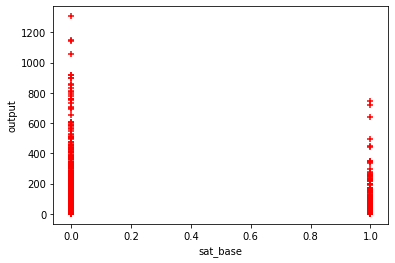

In [36]:
import matplotlib.pyplot as plt
plt.scatter(data.sat_base,data.output,marker='+',color='red')
plt.xlabel('sat_base')
plt.ylabel('output')

Text(0, 0.5, 'output')

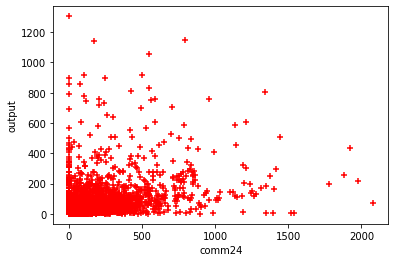

In [37]:
plt.scatter(data.comm24, data.output, marker = '+', color = 'red')
plt.xlabel('comm24')
plt.ylabel('output')

Text(0, 0.5, 'output')

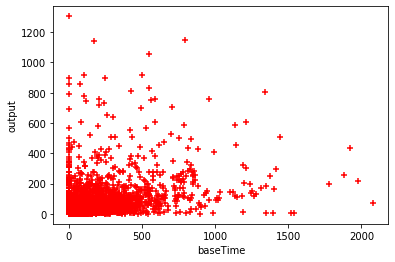

In [38]:
plt.scatter(data.comm24, data.output, marker = '+', color = 'red')
plt.xlabel('baseTime')
plt.ylabel('output')

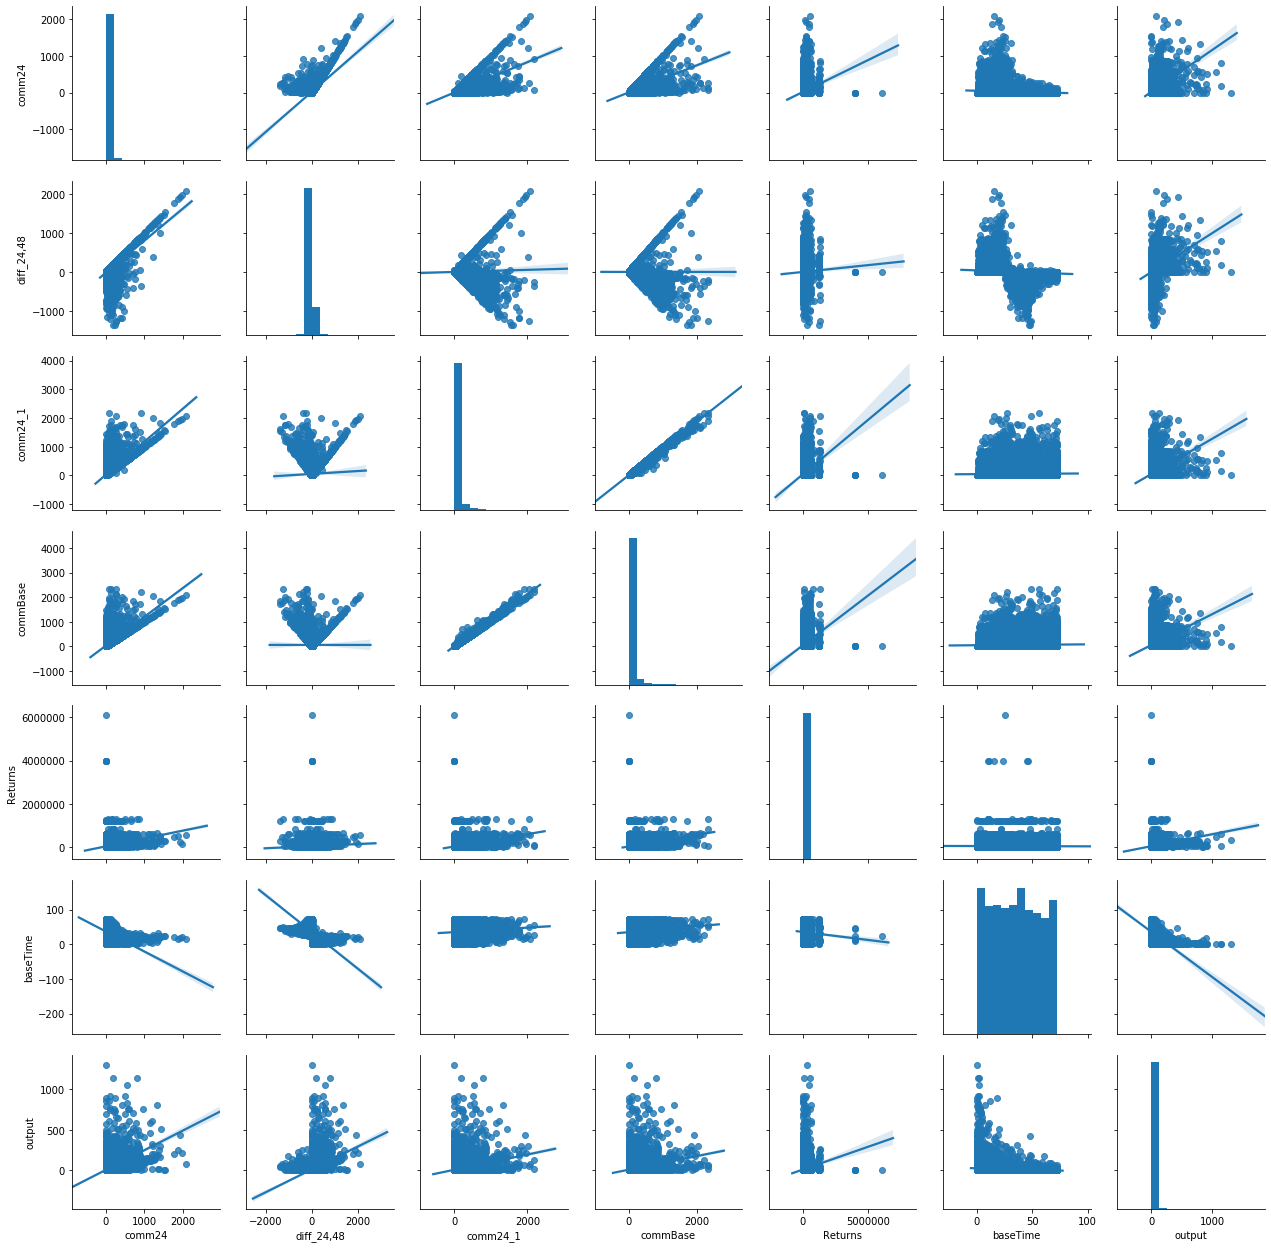

In [39]:
sns.pairplot(data[['comm24','diff_24,48','comm24_1','commBase','Returns','baseTime','output']], kind ='reg')
plt.show()

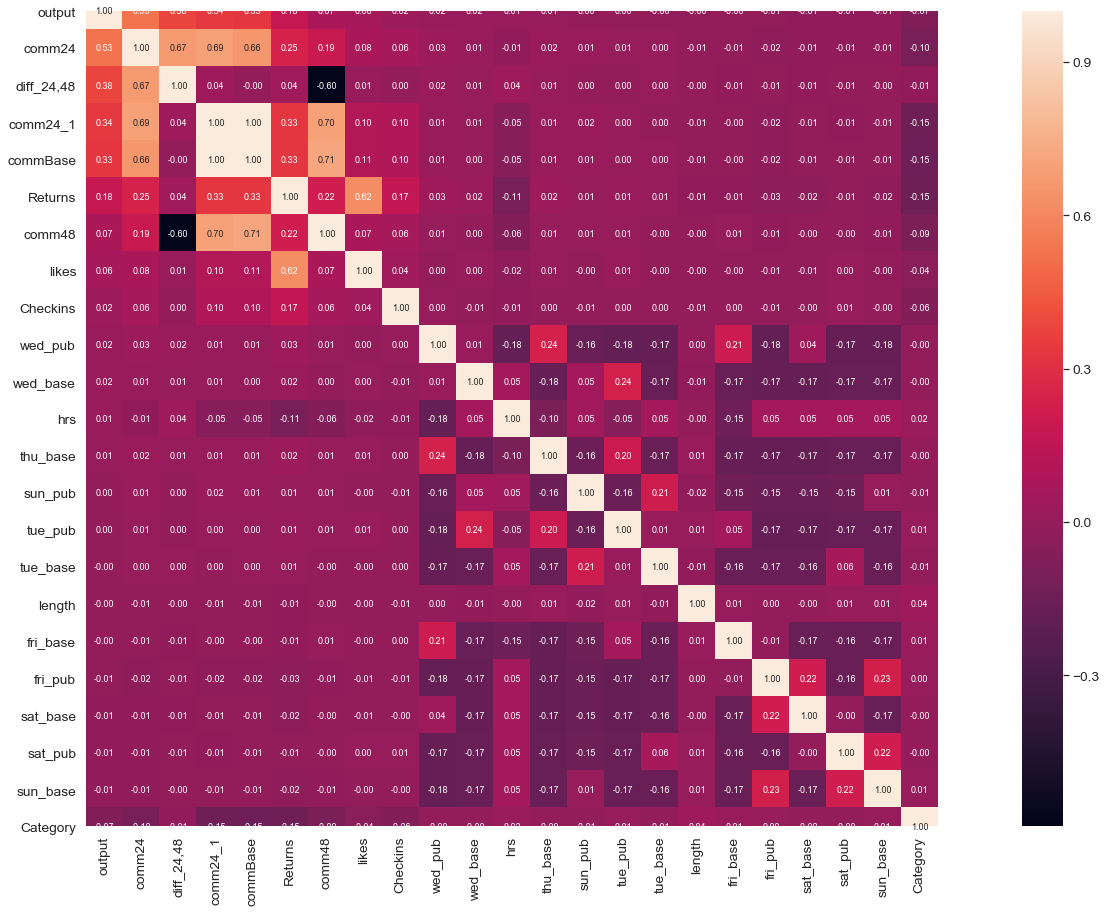

In [40]:
k = 23 #number of variables for heatmap
plt.figure(figsize=(30,15))
corrmat = data.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'output')['output'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

If we observe above correlation map we dont find many correlated features with our target variable. only top 7 features are slightly correlated to each other and have positive correlation. 

**Check for Positive Correlation, negative correlation, and multi collinearty**

**Features with good Positive Relationship**

In [41]:
corr = data.corr()

In [42]:
Pos_corr = pd.DataFrame(corr.output[(data.corr().output>0.1) & (data.corr().output<1)].sort_values(ascending=False))
Pos_corr

,output
comm24,0.528696
"diff_24,48",0.378453
comm24_1,0.341741
commBase,0.326886
Returns,0.177330


**Features with good negative relationship**

In [43]:
Neg_corr = pd.DataFrame(corr.output[(data.corr().output>-1) & (data.corr().output<-0.1)].sort_values(ascending=False))
Neg_corr

,output
baseTime,-0.221962


**MultiCollinearity**

In [44]:
Multi_corr = corr.iloc[0:-1,0:-1]
#0.7 is the highest correlation value
Multi_corr = Multi_corr[(Multi_corr>0.7)&(Multi_corr<1)|(Multi_corr<-0.7)&(Multi_corr>-1)].dropna(axis=0, how= 'all').dropna(axis=1, how='all')
Multi_corr

,commBase,comm48,comm24_1
commBase,NaN,0.71364,0.996735
comm48,0.713640,NaN,NaN
comm24_1,0.996735,NaN,NaN


Some selected from correlation plot : **comm24**, **diff_24,48**, **comm24_1**, **commBase**, **Returns**, **baseTime**, **output**

# Variance Threshold Factor

In [45]:
X = data.loc[:,data.columns!='output']
Y = data.loc[:,data.columns=='output']

In [46]:
X.shape

(40949, 23)

In [47]:
Y.shape

(40949, 1)

In [48]:
!pip install statsmodel

  ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel


In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = pd.DataFrame()
VIF['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF['Features'] = X.columns
VIF.sort_values('VIF Factor').reset_index(drop=True)

,VIF Factor,Features
0,1.094145,Checkins
1,1.190496,length
2,1.626985,sun_pub
3,1.677261,tue_pub
4,1.707772,wed_pub
5,1.745339,likes
6,1.779439,fri_pub
7,1.793657,sat_pub
8,2.082260,sun_base
9,2.150584,tue_base


In [50]:
X = np.array(data.iloc[:,data.columns!='output'])
Y = np.array(data.iloc[:,data.columns=='output']).reshape(-1)

In [51]:
featuresselected = 15
#RFE is Recursive Feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
estimator = LinearRegression()
clf = RFE(estimator, n_features_to_select = featuresselected)
clf.fit(X,Y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [52]:
print("Feature Ranking by RFE")
[i+ ' - ' +str(j) for i,j in zip (data.columns.tolist(), clf.ranking_.tolist())]

Feature Ranking by RFE


['likes - 9',
 'Checkins - 7',
 'Returns - 8',
 'Category - 5',
 'commBase - 4',
 'comm24 - 1',
 'comm48 - 1',
 'comm24_1 - 3',
 'diff_24,48 - 1',
 'baseTime - 1',
 'length - 6',
 'hrs - 1',
 'sun_pub - 1',
 'tue_pub - 1',
 'wed_pub - 1',
 'fri_pub - 1',
 'sat_pub - 1',
 'sun_base - 1',
 'tue_base - 1',
 'wed_base - 1',
 'thu_base - 1',
 'fri_base - 2',
 'sat_base - 1']

In [53]:
print ("Top {} selected features are listed below". format(featuresselected))
data.columns[:-1][clf.support_].tolist()

Top 15 selected features are listed below


['comm24',
 'comm48',
 'diff_24,48',
 'baseTime',
 'hrs',
 'sun_pub',
 'tue_pub',
 'wed_pub',
 'fri_pub',
 'sat_pub',
 'sun_base',
 'tue_base',
 'wed_base',
 'thu_base',
 'sat_base']

# Finalizing the Features 

**TOP 15 selected features from Recursive Feature Selection**

comm24,comm48, diff_24,48, baseTime, hrs, sun_pub, tue_pub, wed_pub, fri_pub, sat_pub, sun_base, tue_base, wed_base, thu_base, sat_base 

**Collinearity from VIF and Collinearity Plot**

1. We can drop diff_24,48 feature that reduce correlation with comm24, comm48

In [54]:
data.columns

Index(['likes', 'Checkins', 'Returns', 'Category', 'commBase', 'comm24',
       'comm48', 'comm24_1', 'diff_24,48', 'baseTime', 'length', 'hrs',
       'sun_pub', 'tue_pub', 'wed_pub', 'fri_pub', 'sat_pub', 'sun_base',
       'tue_base', 'wed_base', 'thu_base', 'fri_base', 'sat_base', 'output'],
      dtype='object')

In [55]:
columns = ['comm24','comm48','comm24_1','baseTime','hrs','wed_pub','fri_pub','mon_base','tue_base','wed_base','thu_base','fri_base','Returns','likes','Checkins','output']

In [56]:
print("No.of Selected Features with 1 target variable is",len(columns))

No.of Selected Features with 1 target variable is 16


# Feature Transformation

Here i am using log transform to remove skewness and kurtosis.

Log Tranformation = - log1p(x) = log(1+x)

In [57]:
data = np.log1p(data)

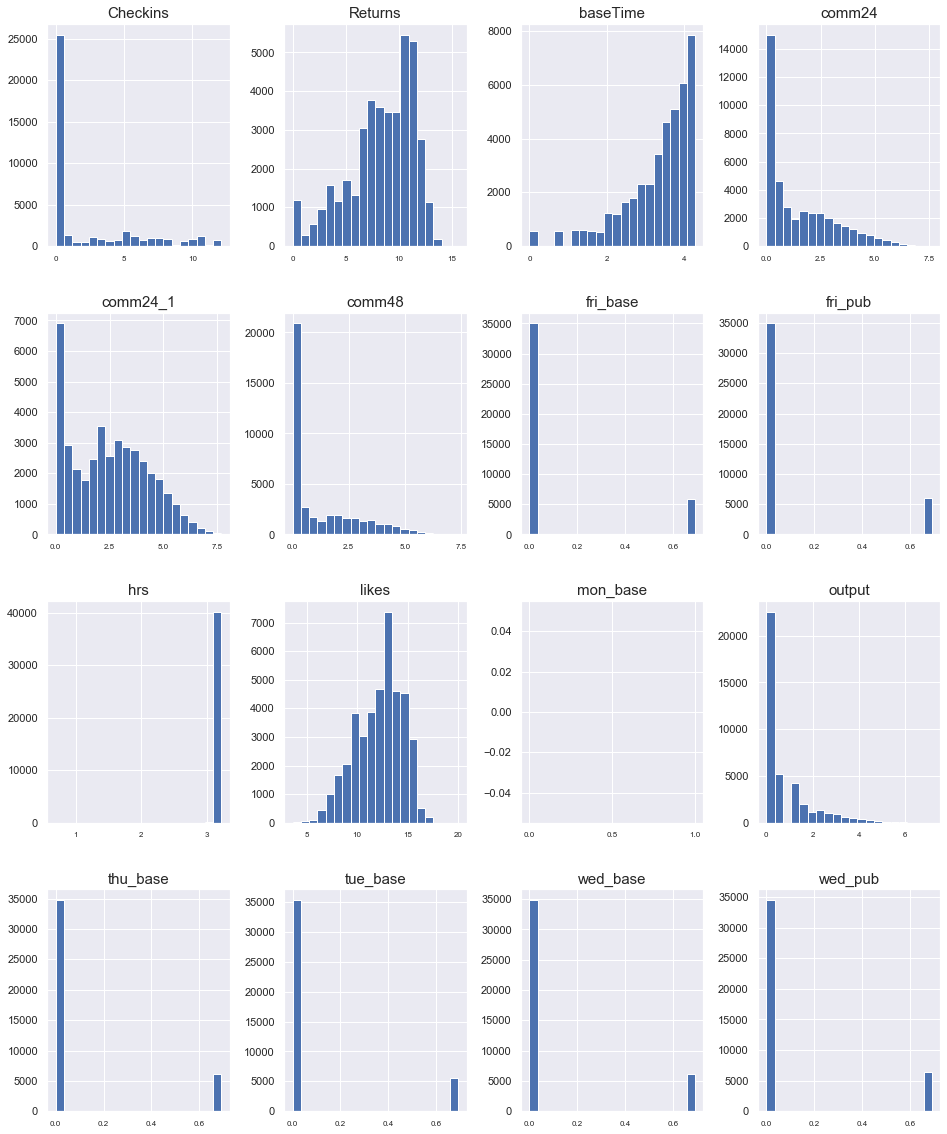

In [58]:
data.loc[:, columns].hist(figsize = (16,20), bins = 20, xlabelsize=8, ylabelsize = 11)
plt.show()

In [59]:
data.skew()

likes         -0.459301
Checkins       1.327939
Returns       -0.786244
Category      -0.447856
commBase       0.235882
comm24         0.948006
comm48         1.136911
comm24_1       0.247389
diff_24,48          NaN
baseTime      -1.436415
length        -1.167215
hrs          -11.595019
sun_pub        2.305048
tue_pub        1.963243
wed_pub        1.880652
fri_pub        2.003349
sat_pub        2.112385
sun_base       2.055601
tue_base       2.103697
wed_base       1.975935
thu_base       1.951203
fri_base       2.029360
sat_base       2.017830
output         1.685329
dtype: float64

# Modelling 

**split the training and testing data**

In [83]:
data.drop(['likes', 'diff_24,48', 'hrs','length'],axis = 1)

,Checkins,Returns,Category,commBase,comm24,comm48,comm24_1,baseTime,sun_pub,tue_pub,wed_pub,fri_pub,sat_pub,sun_base,tue_base,wed_base,thu_base,fri_base,sat_base,output
0,0,327,0,0,0,0,0,65,0,0,1,0,0,0,0,0,0,0,1,0
1,0,327,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,1,0,0
2,0,327,0,0,0,0,0,14,0,0,0,1,0,0,0,0,0,0,1,0
3,0,327,0,7,0,3,7,62,0,0,0,1,0,0,0,0,0,0,0,0
4,0,327,0,1,0,0,1,58,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,54,207,7,269,14,58,240,56,0,0,1,0,0,0,0,0,0,1,0,1
40945,54,207,7,618,20,106,596,53,0,0,1,0,0,0,0,0,0,1,0,2
40946,54,207,7,598,507,0,597,19,0,0,1,0,0,0,0,0,1,0,0,72
40947,54,207,7,607,189,410,571,33,0,0,1,0,0,0,0,0,0,1,0,28


In [84]:
X = np.array(data.loc[:,data.columns!='output'])
Y = np.array(data.loc[:,data.columns=='output'])

# Grid Search

In [85]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

In [86]:
def regg(X, Y, reg, param_grid, test_size = 0.20):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = 42)
    reg = GridSearchCV(reg, parameters, cv=10, refit = True)
    reg.fit(X_train, Y_train)
    
    return X_train, X_test, Y_train, Y_test, reg

In [87]:
def evaluation_metrics(X_train, X_test, Y_train, Y_test, reg):
    Y_pred_train = reg.best_estimator_.predict(X_train)
    Y_pred_test = reg.best_estimator_.predict(X_test)
    
    print("Best Parameters:",reg.best_params_)
    print('\n')
    print("Mean cross-validated score of the best_estimator : ", reg.best_score_) 
    print('\n')
    MAE_train = metrics.mean_absolute_error(Y_train, Y_pred_train)
    MAE_test = metrics.mean_absolute_error(Y_test, Y_pred_test)
    print('MAE for training set is {}'.format(MAE_train))
    print('MAE for test set is {}'.format(MAE_test))
    print('\n')
    MSE_train = metrics.mean_squared_error(Y_train, Y_pred_train)
    MSE_test = metrics.mean_squared_error(Y_test, Y_pred_test)
    print('MSE for training set is {}'.format(MSE_train))
    print('MSE for test set is {}'.format(MSE_test))
    print('\n')
    RMSE_train = np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test))
    print('RMSE for training set is {}'.format(RMSE_train))
    print('RMSE for test set is {}'.format(RMSE_test))
    print('\n')
    r2_train = metrics.r2_score(Y_train, Y_pred_train)
    r2_test = metrics.r2_score(Y_test, Y_pred_test)
    print("R2 value for train: ", r2_train)
    print("R2 value for test: ", r2_test)

In [88]:
data.dtypes

likes         int32
Checkins      int32
Returns       int32
Category      int32
commBase      int32
comm24        int32
comm48        int32
comm24_1      int32
diff_24,48    int32
baseTime      int32
length        int32
hrs           int32
sun_pub       int32
tue_pub       int32
wed_pub       int32
fri_pub       int32
sat_pub       int32
sun_base      int32
tue_base      int32
wed_base      int32
thu_base      int32
fri_base      int32
sat_base      int32
output        int32
dtype: object

In [70]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#data = data.apply(lambda col: labelencoder.fit_transform(col.astype(str)))

# Linear Regression

In [89]:
from sklearn.linear_model import LinearRegression

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [95]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
#Interpreting Co-efficients
print(linreg.intercept_)
print(linreg.coef_)

[1.74596602]
[[-3.54751169e-04 -6.10103612e-03 -3.57047595e-03 -1.33367735e-02
   2.10108176e-01  2.63746502e-01 -3.87709268e-02 -2.09571479e-01
   8.87012258e-04 -1.52511477e-01 -2.90695037e-04  2.93931524e-01
  -2.17165245e-01 -6.02276785e-01 -1.23954434e-01  3.43955996e-01
  -2.30627692e-01 -8.54741388e-01 -8.34205538e-01  1.90320489e-01
  -1.98460870e-01  2.55319500e-03 -5.43502415e-01]]


In [97]:
#making predictions based on our model
ypred = linreg.predict(X_test)

In [102]:
from sklearn import metrics
print(metrics.mean_absolute_error(Y_test, ypred))
print(metrics.mean_squared_error(Y_test, ypred))
print(np.sqrt(metrics.mean_squared_error(Y_test, ypred)))

ValueError: Found input variables with inconsistent numbers of samples: [8190, 10238]

In [100]:
reg = LinearRegression()
parameters = {'fit_intercept':[True,False],'normalize':[True,False], 'copy_X':[True, False]}
X_train, X_test, Y_train, Y_test, linreg = regg(X, Y, reg, param_grid=parameters, test_size=0.20)
evaluation_metrics(X_train, X_test, Y_train, Y_test, reg = linreg)

Best Parameters: {'copy_X': True, 'fit_intercept': False, 'normalize': True}


Mean cross-validated score of the best_estimator :  0.4221026728295566


MAE for training set is 6.789418677068309
MAE for test set is 6.542248443838229


MSE for training set is 401.30425487253257
MSE for test set is 317.41800664784694


RMSE for training set is 20.032579835671005
RMSE for test set is 17.816228743700137


R2 value for train:  0.41912985925774215
R2 value for test:  0.4754216958270472


# Decision Tree

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
reg = DecisionTreeRegressor()
parameters = {'max_depth': [5,6,7,8,9,10]}
X_train, X_test, Y_train, Y_test, DTreg = regg(X, Y, reg, param_grid = parameters, test_size = 0.20)
evaluation_metrics(X_train, X_test, Y_train, Y_test, reg = DTreg)

Best Parameters: {'max_depth': 6}


Mean cross-validated score of the best_estimator :  0.6212688055563367


MAE for training set is 3.8340019628664574
MAE for test set is 4.0632108430692435


MSE for training set is 186.19452507628537
MSE for test set is 216.14510143625802


RMSE for training set is 13.64531146864319
RMSE for test set is 14.701874079050535


R2 value for train:  0.7304916689187527
R2 value for test:  0.6427895444113356


# Random Forest Regressor

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
reg = RandomForestRegressor(n_jobs=-1)
parameters = {'n_estimators':[20,25],'max_depth':[7,8,9,10]}
X_train, X_test, Y_train, Y_test, RFreg = regg(X, Y, reg, param_grid=parameters, test_size=0.20)
evaluation_metrics(X_train, X_test, Y_train, Y_test, reg = RFreg)

Best Parameters: {'max_depth': 8, 'n_estimators': 20}


Mean cross-validated score of the best_estimator :  0.7047010606444036


MAE for training set is 3.100789567779767
MAE for test set is 3.728021476339736


MSE for training set is 105.39351706935155
MSE for test set is 191.42510568529934


RMSE for training set is 10.266134475514702
RMSE for test set is 13.835646196882145


R2 value for train:  0.8474475504555982
R2 value for test:  0.6836428456690273


# Gradient Boosting Regressor

In [105]:
from sklearn.ensemble import GradientBoostingRegressor

In [106]:
reg = GradientBoostingRegressor()
parameters = {'alpha':[0.01,0.001],'n_estimators':[150,200],'max_depth':[3,5,7]}
X_train, X_test, Y_train, Y_test, XGreg = regg(X, Y, reg, param_grid=parameters, test_size=0.20)
evaluation_metrics(X_train, X_test, Y_train, Y_test, reg = XGreg)

Best Parameters: {'alpha': 0.01, 'max_depth': 5, 'n_estimators': 150}


Mean cross-validated score of the best_estimator :  0.7268729889650918


MAE for training set is 2.720245501483498
MAE for test set is 3.5812067344433207


MSE for training set is 76.25097605364131
MSE for test set is 173.5437518319964


RMSE for training set is 8.73218048677656
RMSE for test set is 13.17360056446211


R2 value for train:  0.8896300882578937
R2 value for test:  0.7131943206459616


# Support Vector Machines

In [107]:
from sklearn.svm import SVR

In [108]:
reg = SVR()
parameters = {'max_iter':[1000,5000]}
X_train, X_test, Y_train, Y_test, SVRreg = regg(X, Y, reg, param_grid=parameters, test_size=0.20)
evaluation_metrics(X_train, X_test, Y_train, Y_test, reg = SVRreg)

Best Parameters: {'max_iter': 5000}


Mean cross-validated score of the best_estimator :  -0.022463679104496672


MAE for training set is 7.700228760276911
MAE for test set is 7.716081329515584


MSE for training set is 689.6763934309932
MSE for test set is 613.8272781981592


RMSE for training set is 26.261690604966642
RMSE for test set is 24.7755378992699


R2 value for train:  0.0017239566868746392
R2 value for test:  -0.014436692022726572


# Multilayer Perceptron

In [109]:
from sklearn.neural_network import MLPRegressor

In [110]:
reg = MLPRegressor(activation='tanh',early_stopping=True)
parameters = {'solver':['sgd', 'adam'],'learning_rate_init':[0.01,0.001,0.0001],'hidden_layer_sizes':[10,25,50],'max_iter':[500,1000]}
X_train, X_test, Y_train, Y_test, MLPreg = regg(X, Y, reg, param_grid=parameters, test_size=0.20)
evaluation_metrics(X_train, X_test, Y_train, Y_test, reg = MLPreg)

Best Parameters: {'hidden_layer_sizes': 50, 'learning_rate_init': 0.001, 'max_iter': 1000, 'solver': 'adam'}


Mean cross-validated score of the best_estimator :  0.6094630731006224


MAE for training set is 5.188347378697766
MAE for test set is 5.14964158962453


MSE for training set is 242.74071820473017
MSE for test set is 223.84087293017265


RMSE for training set is 15.580138581050239
RMSE for test set is 14.961312540354628


R2 value for train:  0.648643558010007
R2 value for test:  0.6300711898283233
